<a href="https://colab.research.google.com/github/Deanna1117/2048/blob/master/Logistic_Regression_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
mydata <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/MedSchoolApplicants.csv',
                    stringsAsFactors = TRUE)


In [4]:
names(mydata)
head(mydata)

[1] "Accept"      "Accept_code" "Sex"         "BCPM"        "GPA"        
 [6] "VR"          "PS"          "WS"          "BS"          "MCAT"       
[11] "Apps"

,Accept,Accept_code,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
,<fct>,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,D,0,F,3.59,3.62,11,9,9,9,38,5
2,A,1,M,3.75,3.84,12,13,8,12,45,3
3,A,1,F,3.24,3.23,9,10,5,9,33,19
4,A,1,F,3.74,3.69,12,11,7,10,40,5
5,A,1,F,3.53,3.38,9,11,4,11,35,11
6,A,1,M,3.59,3.72,10,9,7,10,36,5


## This is the HW for Thursday!  

The goal is to build a model to predict the acceptance to medical school based pn servaral predictors.

The Medical College Admissions Test (MCAT) has four sections:
- Verbal Reasoning (VR)
- Physical Sciences (PS)
- Biological Sciences (BS)
- Writing Sample (WS)

Q1: Explore the distribution of GPA values for Accepted and Denied candidates


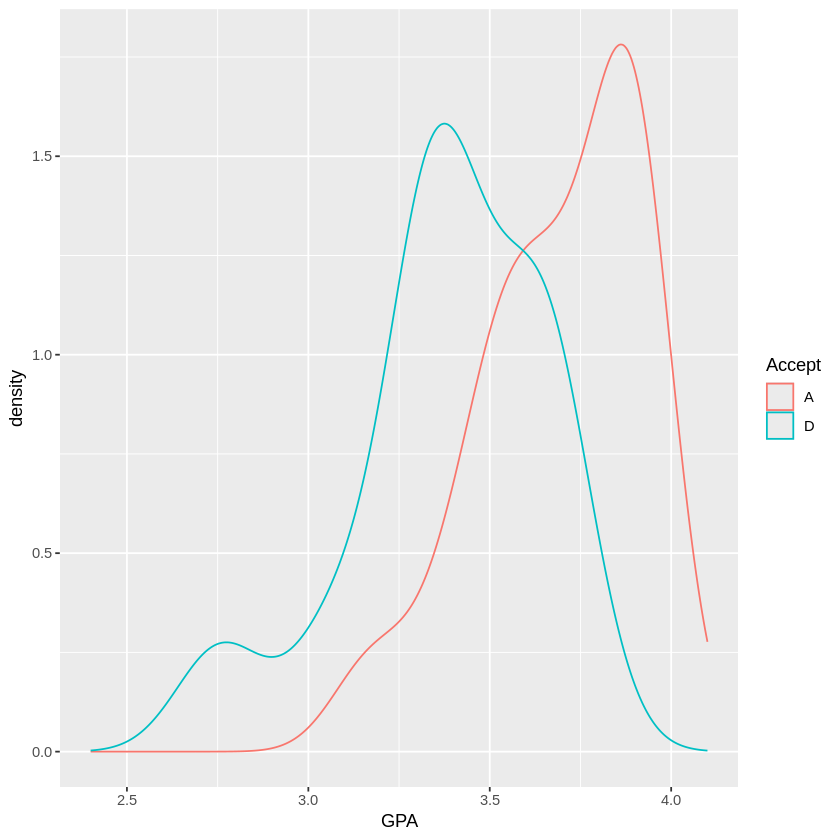

In [ ]:
mydata %>%
  ggplot() +
  aes( x = GPA, col = Accept) +
  geom_density() +
  xlim(c(2.4,4.1))

Q2: Explore the distribution of MCAT values for cccepted and denied candidates.





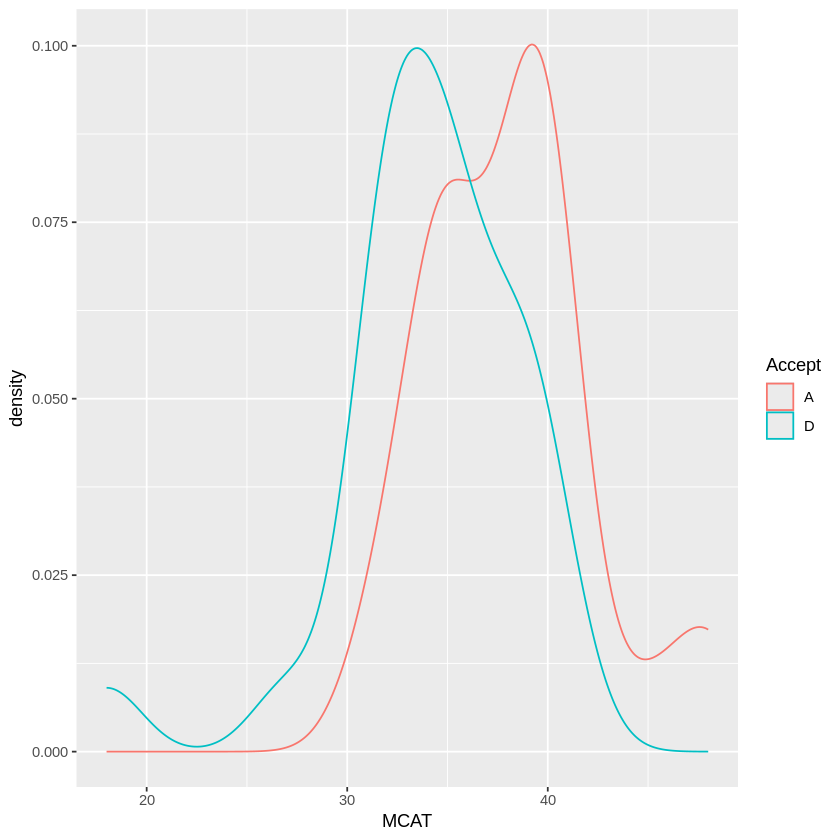

In [6]:
mydata %>%
  ggplot() +
  aes( x = MCAT, col = Accept) +
  geom_density()

Q3: Explore the distribution of number of applications submitted for Accepted and Denied candidates



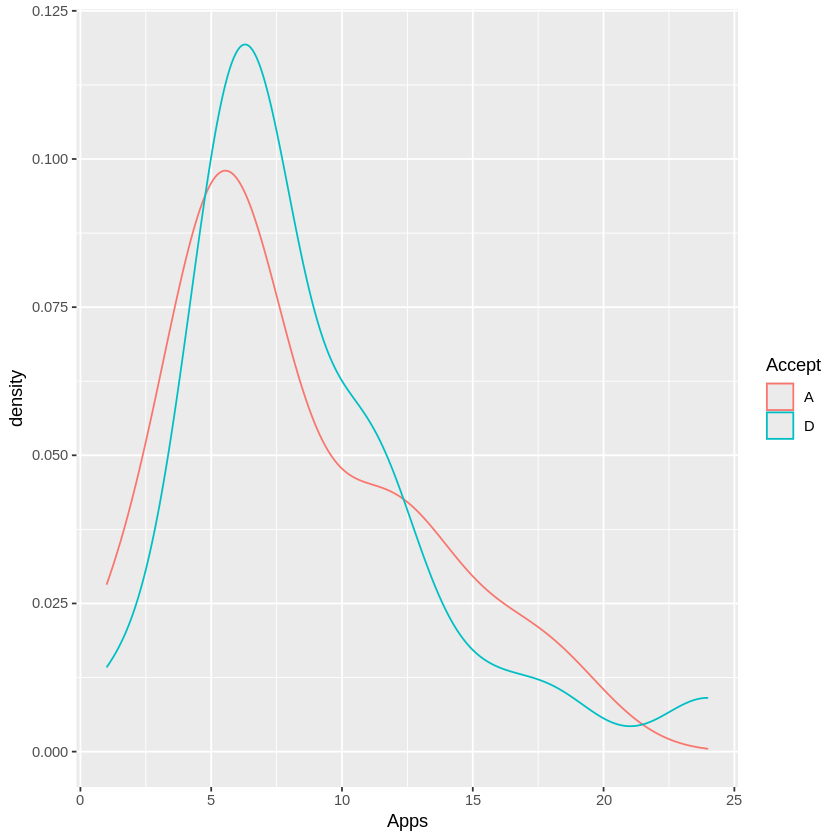

In [7]:
mydata %>%
  ggplot() +
  aes( x = Apps, col = Accept) +
  geom_density()

Q4: Is there a correlation beteween GPA values and MCAT values for Accepted and Denied candidates?  
**Hint:** Use a scatterplot.

Q5: Is this relationship similar(or different) for males and females.  
**Hint:** Use facets.


`geom_smooth()` using formula = 'y ~ x'


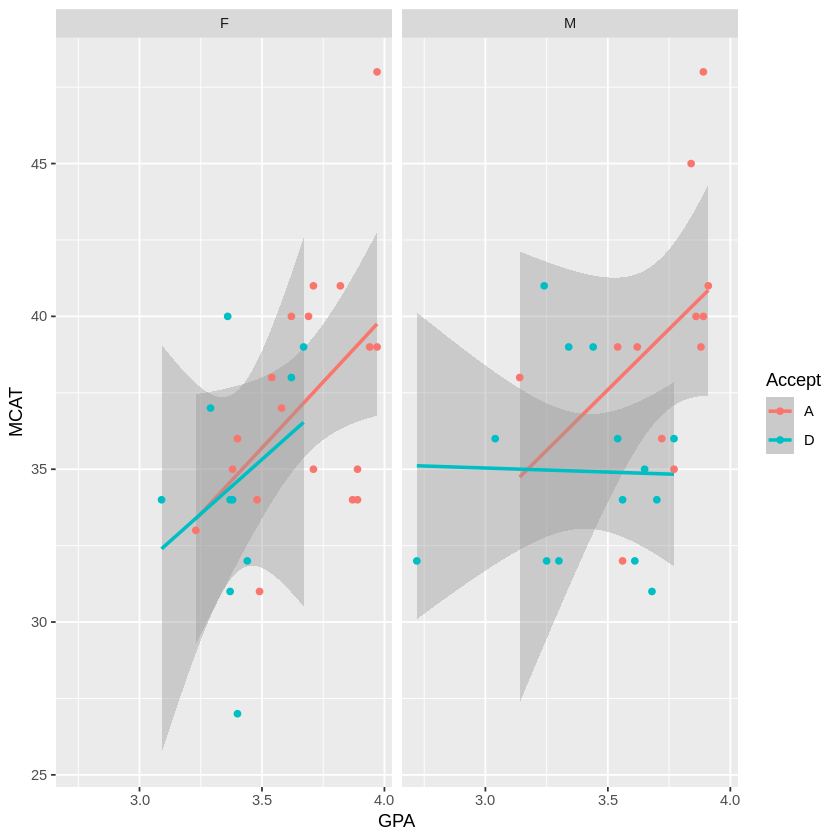

In [19]:
mydata %>%
  ggplot()+
  aes(x = GPA, y = MCAT, col = Accept)+
  geom_smooth(method = "lm")+
  geom_point()+
  facet_wrap(~Sex) #makes two graphs

In [18]:
mydata %>%
  filter(MCAT > 20)%>% #filter the one outlier
  group_by(Sex) %>%
  summarize(cor(GPA, MCAT))

Sex,"cor(GPA, MCAT)"
<fct>,<dbl>
F,0.5097200
M,0.4008728


Q6: Draw a plot to explore the relationship between GPA and acceptance.  Add the logistic regression curve into the plot.

`geom_smooth()` using formula = 'y ~ x'



Call:
glm(formula = Accept_code ~ GPA + Sex + GPA * Sex, family = "binomial", 
    data = mydata)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -24.385     10.082  -2.419   0.0156 *
GPA            7.083      2.891   2.450   0.0143 *
SexM           4.901     13.156   0.373   0.7095  
GPA:SexM      -1.709      3.709  -0.461   0.6450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 53.729  on 51  degrees of freedom
AIC: 61.729

Number of Fisher Scoring iterations: 5


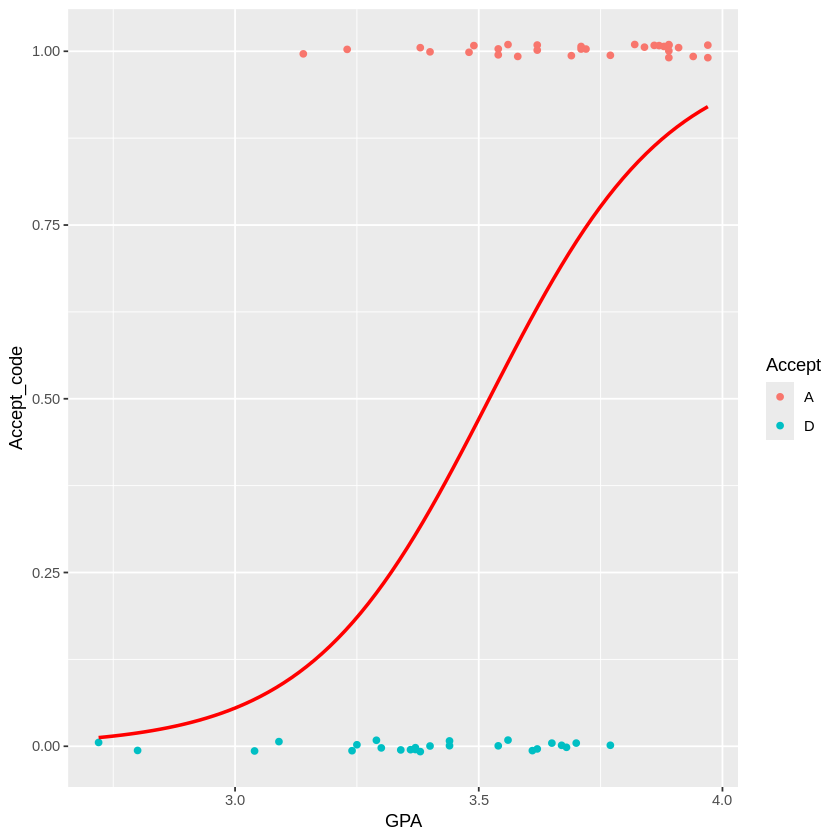

In [28]:
mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)

model1 <- glm(Accept_code ~ GPA, family = "binomial", data = mydata)
summary(model2)


Q7: Is the probability of acceptance based on GPA is similar(or different) for males and females?

In [22]:


mydata %>%
ggplot() +
  aes(x = GPA, y = Accept_code, col = Accept) +
  geom_jitter(height = 0.01, width = 0) +
  geom_smooth(method = 'glm',
              method.args = list(family = 'binomial'),
              se = FALSE ,
              col = 'red' ,
              fullrange = TRUE)


ERROR: Error in eval(predvars, data, env): object 'Accept_code' not found


Q8: Use the `glm()` command to fit a logistic model to predict the acceptance probability usinig `GPA` and `Sex` as predictors

In [27]:
model2 <- glm(Accept_code ~ GPA + Sex + GPA*Sex, family = "binomial", data = mydata)
summary(model2)


Call:
glm(formula = Accept_code ~ GPA + Sex + GPA * Sex, family = "binomial", 
    data = mydata)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -24.385     10.082  -2.419   0.0156 *
GPA            7.083      2.891   2.450   0.0143 *
SexM           4.901     13.156   0.373   0.7095  
GPA:SexM      -1.709      3.709  -0.461   0.6450  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 53.729  on 51  degrees of freedom
AIC: 61.729

Number of Fisher Scoring iterations: 5


Q9: Write down equations of the two fitted logistic curves.

Q10: What is the $R^2$ of your model?  Do you see one in your model output?

In [31]:
# Tree code

bone_density <- read.csv('https://raw.githubusercontent.com/gitcnk/Data/master/Stat254/bone_mineral_density.csv')

install.packages('rpart', 'visNetwork', 'sparkline')

library(dplyr)
library(ggplot2)
library(rpart)
library(visNetwork)


mytree <- rpart(bmd ~ age + sex + fracture,
                data = bone_density)

mytree %>%
  visTree()


Warning message in install.packages("rpart", "visNetwork", "sparkline"):
“'lib = "visNetwork"' is not writable”


ERROR: Error in install.packages("rpart", "visNetwork", "sparkline"): unable to install packages
